---
# Day 2: Introduction to Machine Learning in Python
---

## 1. Introduction <a id='l_overview'></a>

The goal of today's lecture is to present unsupervised Machine Learning. We will learn about the most typical machine learning problems, such as dimensionality reduction, and how to approach these using the Python programmming language. These are the important concepts that we will cover:

- [Machine Learning](#l_ml)
- [Data sets](#l_ds)
- [Dimensionality reduction](#l_dr) 
- [Principal Component Analysis (PCA)](#l_pca)

## 2. Machine Learning <a id='l_ml'></a>

Below is the outline of the field with specific algorithms:

1. **Unsupervised Learning** - there is no correct input/output pair 
    - *Clustering*
        - K-Means
        - Hierarchical
        - Spectral
    - *Dimensionality reduction*
        - Principal Components Analysis (PCA)
        - Multidimensional Scaling (MDS)
        - Stochastic Neighbour Embedding (t-SNE)
        - Uniform Manifold Approximation and Projection (UMAP)
        
        
2. **Supervised Learning** - there is a correct input/output pair
    - *Regression*
        - Curve fitting
        - Linear regression 
    - *Classification*
        - Linear Classifiers (Support Vector Machines, Logistic regression)
        - Decision Trees
        - Neural Networks


## 3. Generating data sets

Setup:
- Suppose one has $p$ samples of N-dimensional data points, $x_i\in\mathbb{R}^N$
- Store these samples columnwise as $X\in\mathbb{R}^{p\,\times\,N}$
- We call this the original data matrix, or simply the data
- Assumption: there is a meaningful metric (e.g. Euclidean distance) on the data space (high dim)
- Assumption: there is a meaningful metric (e.g. Euclidean distance) on the latent space (low dim)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 3.1 Generate linear data with noise (2-dimensional data set) with 100 points:

In [2]:
raw_data_x = np.random.uniform(0,10, size=(100,))
raw_data_y = 0.5 * raw_data_x + np.random.normal(0,1,len(raw_data_x))

X_2d      = np.empty((100, 2))
X_2d[:,0] = raw_data_x
X_2d[:,1] = raw_data_y

Visualize

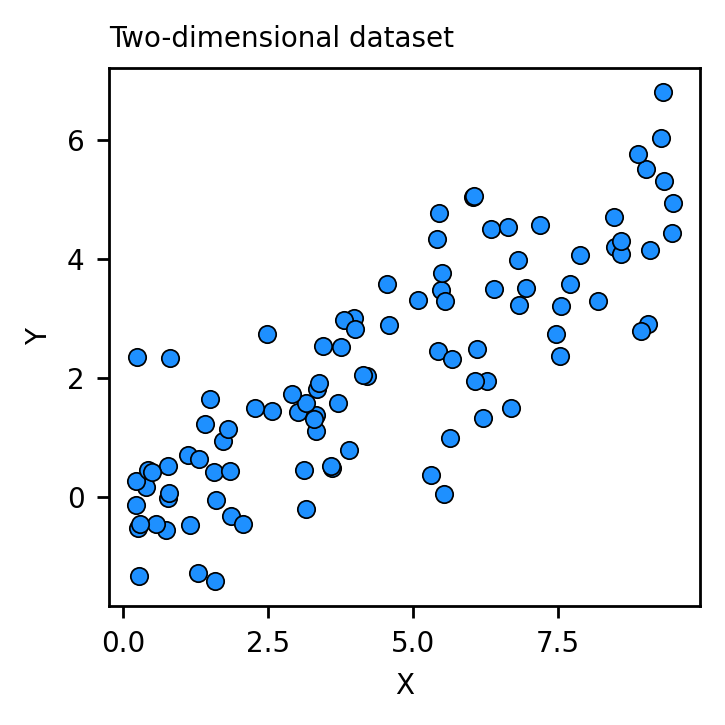

In [3]:
plt.figure(dpi=250, figsize=(3,3))
plt.scatter(X_2d[:,0], X_2d[:,1], marker='.', color='dodgerblue', s= 100, edgecolor='k', lw=0.5)
plt.xlabel('X', fontsize=8)
plt.xticks(fontsize=8)
plt.ylabel('Y', fontsize=8)
plt.yticks(fontsize=8)
plt.title('Two-dimensional dataset', loc='left', fontsize=8)
plt.tight_layout()
plt.show()

Let's look how the data looks like (first 10 points):

In [4]:
X_2d[:10]

array([[ 6.27657562,  1.943662  ],
       [ 3.90463832,  0.7945398 ],
       [ 3.99196051,  3.0065375 ],
       [ 0.39507006,  0.1651424 ],
       [ 6.03227987,  5.03626223],
       [ 9.09023064,  4.15495281],
       [ 3.76475306,  2.52353378],
       [ 6.40292061,  3.49247572],
       [ 0.74209758, -0.54622809],
       [ 1.29295566, -1.28340857]])

## 3.2 Load high-dimensional data from the [MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset. 
![](pics/mnist.png)

Let's take only 1000 data points

In [5]:
import pandas as pd
df = pd.read_csv('data/mnist_test.csv')
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Each row represents a number. 
The image is 28 pixels by 28 pixels. Each pixel assigned a value between 0 and 255 ($2^8 = 256$) which corresponds to shades from white to black. We can store each image (i.e. each number) as a vector instead of a matrix by 'flattening' the vector. i.e. we stack the rows of each image side-by-side. This is why each number is represented by $28 \times 28 = 784$ numbers. We can now visualize what these data points represent (digital images):

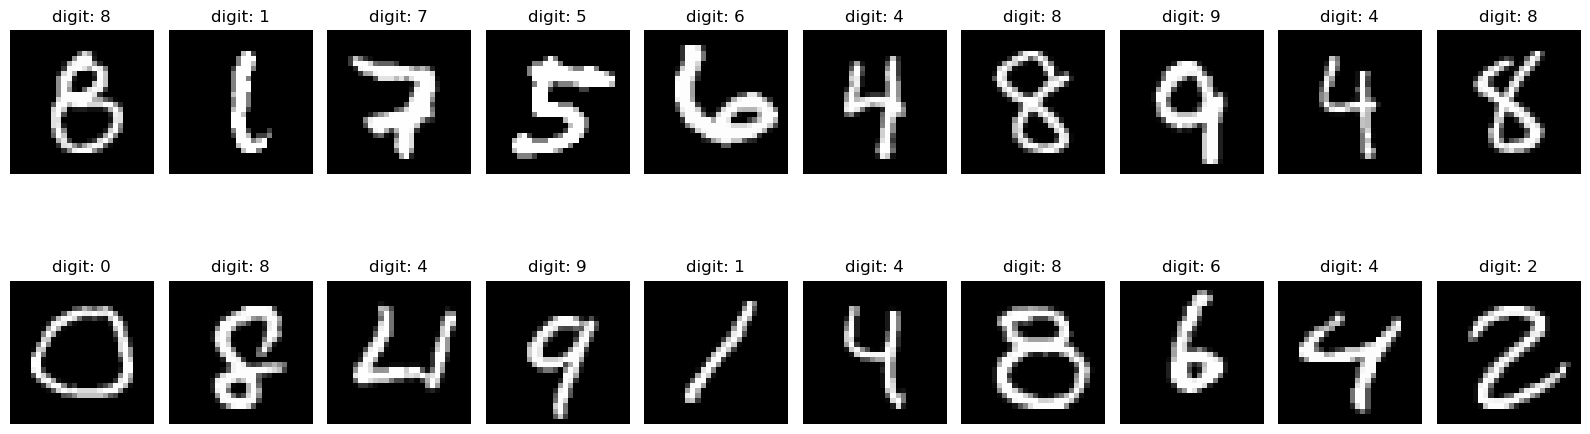

In [6]:
# Plot the first 20 digits
fig, axes = plt.subplots(2, 10, figsize=(16, 6))
for i, j in enumerate(np.random.choice(np.arange(1000), size=20)):

    # we take each row (iloc) and reshape the vector of 784 numbers back into its 28 x 28 pixel format, and visualize!
    image = np.array(df.iloc[j, 1:]).reshape(28,28) # exclude the first element which is row index
    label = np.array(df.iloc[j, 0])
    axes[i//10, i%10].imshow(image, cmap='gray');
    axes[i//10, i%10].axis('off')
    axes[i//10, i%10].set_title(f"digit: {label}")
    
plt.tight_layout()

### We will only use the first 1000 digits

In [7]:
X = np.array(df.iloc[:1000, 1:]).reshape(-1, 28, 28)
Y = np.array(df.iloc[:1000, 0])
print(Y.shape, X.shape)

(1000,) (1000, 28, 28)


0


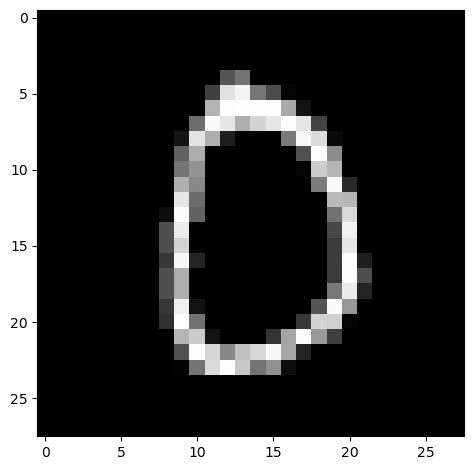

In [8]:
plt.imshow(X[567], cmap='gray')
print(Y[567])
plt.tight_layout()
plt.show()

We want to convert each data point (picture with a handwritten digit) back to a vector which dimensionality is 28x28 = 784. i.e. to make each 28x28 matrix a flat vector

In [9]:
X = X.reshape(1000, 784)
X[567].shape

(784,)

## Summary - we have two data sets:
- 2-dimensional data set with 100 points
- 784-dimensional data set with 1000 points

## 4. Dimensionality reduction <a id='l_dr'></a>

Dimensionality reduction is a technique used in machine learning and data analysis to reduce the number of input features or variables of a dataset while still retaining the important information. This is done by projecting the high-dimensional data onto a lower-dimensional space, while preserving the relevant characteristics of the original data.

The main goal of dimensionality reduction is to simplify the dataset and make it more manageable for analysis, visualization, and modeling. It also helps to reduce the risk of overfitting and improve the performance of machine learning models by removing irrelevant or redundant features.

There are two main types of dimensionality reduction:

- Feature selection: In this method, a subset of the original features is selected based on some criteria, such as correlation or importance.

- Feature extraction: In this method, a new set of features is created by transforming the original features into a lower-dimensional space using techniques such as principal component analysis (PCA), singular value decomposition (SVD), or t-distributed stochastic neighbor embedding (t-SNE).

Overall, dimensionality reduction is a powerful tool for reducing the complexity of large datasets while still preserving the essential information needed for effective analysis and modeling. You can select a subset of original variables, or find a linear or nonlinear combination of features, or make a projection to lower dimensions. 

![](pics/dr.png)


Methods:
- **Principal Components Analysis (PCA)** - linear method to extract dimensions with the highest variance
- **Multidimensional Scaling (MDS)** - nonlinear method to project in lower dimensions by saving pairwise distances
- **Stochastic Neighbour Embedding (t-SNE)** - making an embedding in lower dimensions by conserving distribution of distances 
- **Uniform Manifold Approximation and Projection (UMAP)** - projecting the data on manifold into fewer dimensions

## 5. Principal Component Analysis <a id='l_dr'></a>

### **Math**:

- **PCA goal**: Find orthogonal transformation $W$ of the centered data $X_c$ (i.e. $Y=WX_c$) such that variance along subsequent components is maximized (i.e. most variance along first, the second most variance is along the second, etc.); 
- Note that $X_c$ is $p \times N$, $W$ is $N \times N$, $Y$ is $p \times N$, principal components are the columns of $W$.
- Principal components of $X_c$ are typically found via eigendecomposition of covariance matrix $X_c^T X_c$ .
- The PCA embedding is $Y=U^T X_c$, where $U$ stores columnwise eigenvectors of $X_c^T X_c$ in decreasing order (by eigenvalue).

### Compute principle components via eigenvectors of covariance matrix

1. Center data set, i.e. first subtract the mean of the dataset from the dataset.
2. Compute the covariance matrix $X_c^T X_c$.
3. Compute eigenvectors of $X_c^T X_c$ and order them in terms of decreasing eigenvalues.
4. Project the original data onto our new principal components, which are the eigenvectors stored columnwise in a matrix $U$ by $Y=U^T X_c$.
5. Compare our step-by-step method to the pythonic library PCA implementation.

## Now we apply PCA method to 2D dataset:

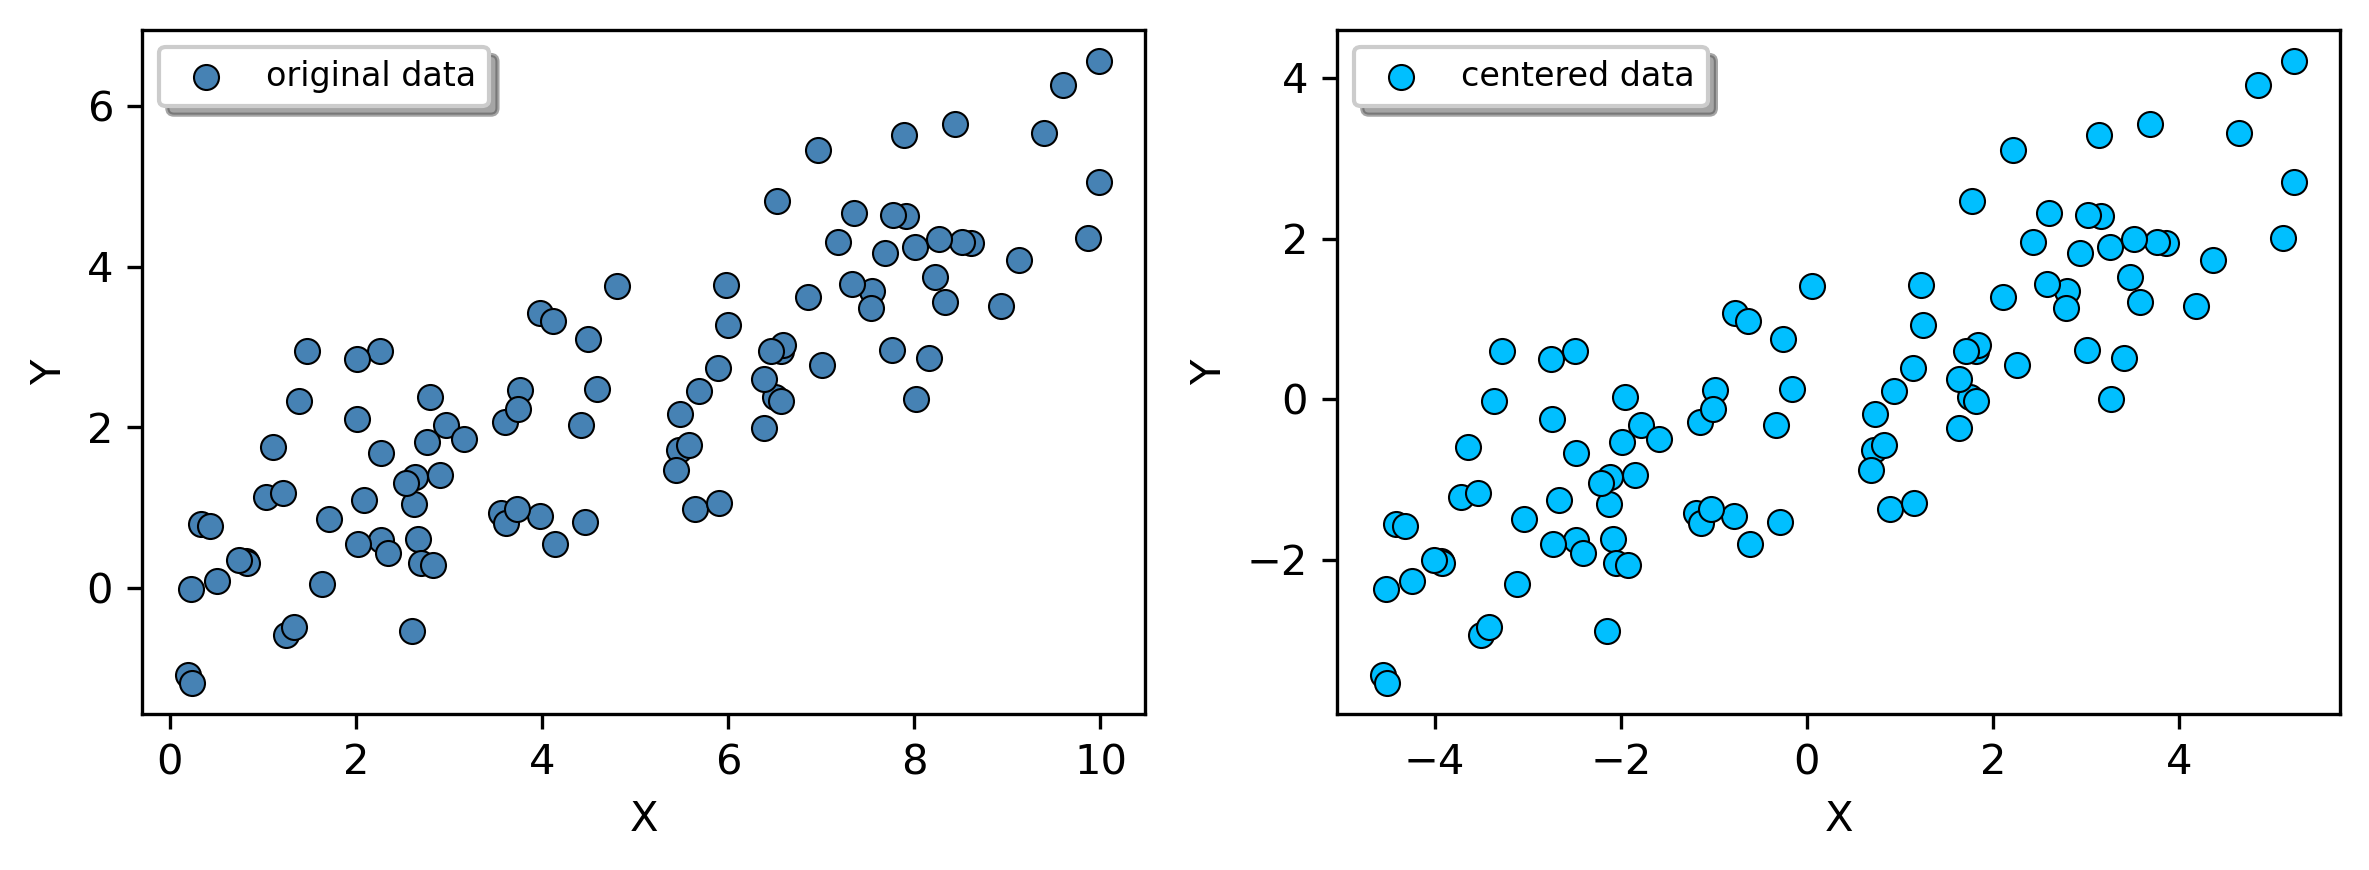

In [11]:
# Step 1

X_2d_centered = X_2d - np.mean(X_2d, axis=0)

# Visualize
fig, axs = plt.subplots(1, 2, figsize=(8, 3), dpi=300)

axs[0].scatter(X_2d[:,0], X_2d[:,1], label='original data', color='steelblue', edgecolor='k', lw=0.5,)
axs[1].scatter(X_2d_centered[:,0], X_2d_centered[:,1], label='centered data', color='deepskyblue', edgecolor='k', lw=0.5,)
axs[0].legend(fancybox=True, shadow=True, fontsize=8)
axs[1].legend(fancybox=True, shadow=True, fontsize=8)

for ax in axs:
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

plt.tight_layout()
plt.show()

We see that the data is now centered on the origin (pay attention to the coordinates on the axes).
Now compute the transformation:

In [12]:
# Step 2.
Cov = np.dot(np.transpose(X_2d_centered), X_2d_centered)
print("Covariance matrix:")
print(Cov)

Covariance matrix:
[[785.30835392 397.94083157]
 [397.94083157 293.60397172]]


In [13]:
#Step 3
eigvals, W = np.linalg.eig(Cov)
print("\nEigenvalues:")
print(eigvals)
print("\nEigenvectors (columns)")
print(W)

print("\nCheck that eigenvectors are orthogonal by computing their inner product (<w1,w2>=0):")
print(f'Inner product is: {np.dot(W[:,0],W[:,1])}.')

print('\nVariance in the first principal component: {}'.format(eigvals[0]/np.sum(eigvals)))
print('Variance in the second principal component: {}'.format(eigvals[1]/np.sum(eigvals)))


Eigenvalues:
[1007.21700482   71.69532083]

Eigenvectors (columns)
[[ 0.87338244 -0.48703502]
 [ 0.48703502  0.87338244]]

Check that eigenvectors are orthogonal by computing their inner product (<w1,w2>=0):
Inner product is: 0.0.

Variance in the first principal component: 0.933548520003139
Variance in the second principal component: 0.06645147999686106


Let's plot the eigenvectors in comparison to the data

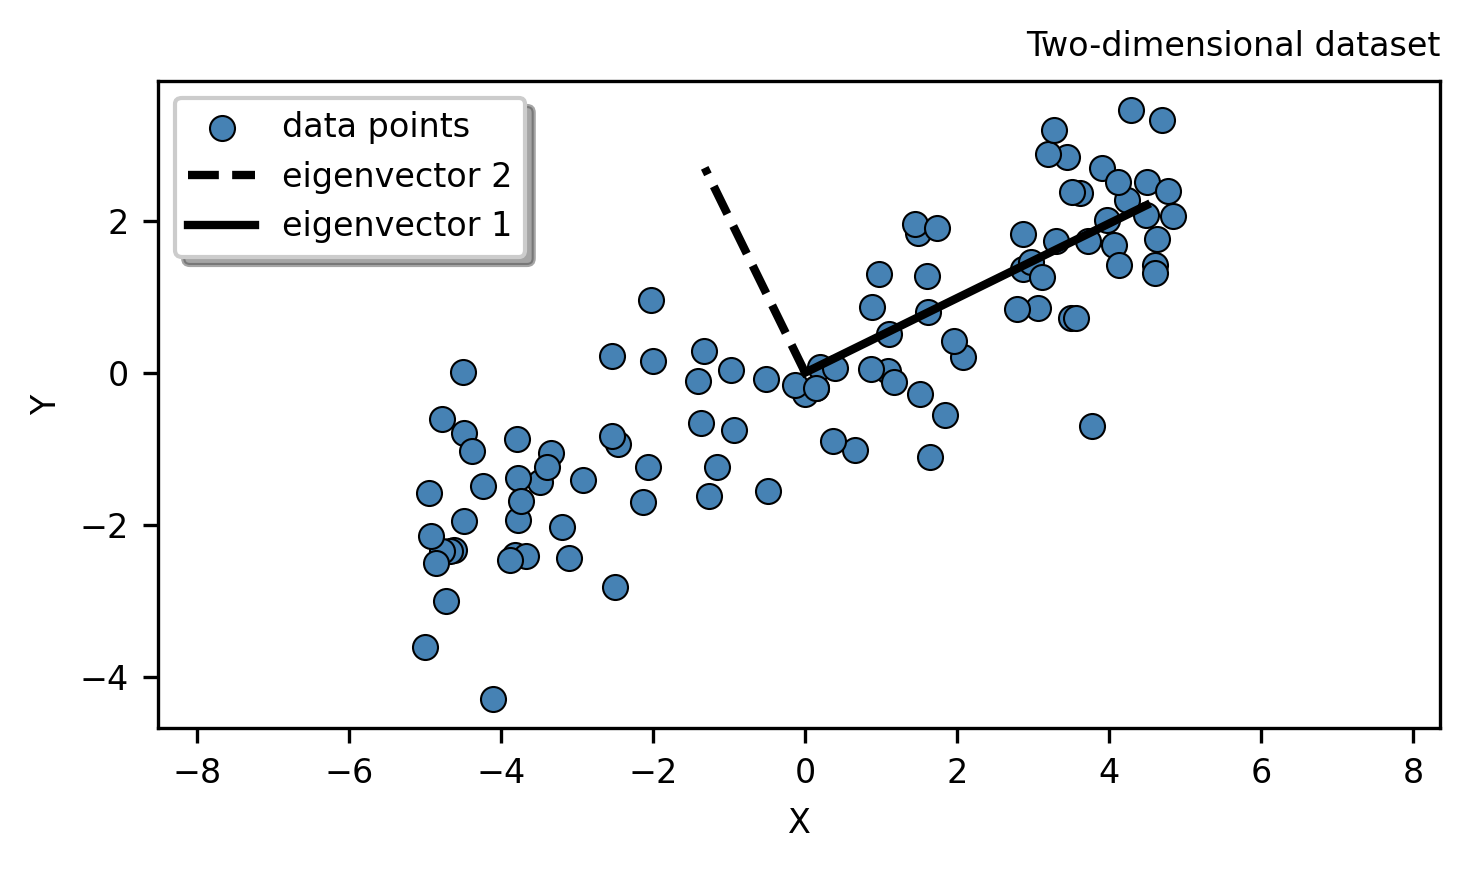

In [20]:
plt.figure(dpi=300, figsize=(5,3))

plt.scatter(X_2d_centered[:,0], X_2d_centered[:,1], color='steelblue', edgecolor='k', lw=0.5, label='data points')
plt.xlabel('X', fontsize=8)
plt.ylabel('Y', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Two-dimensional dataset', loc='right', fontsize=8)

plt.plot([0, W[0][1]*3],[0, W[1][1]*3],'k',lw=2, label='eigenvector 2', ls='--') # scale vector for easier visual
plt.plot([0, W[0][0]*5],[0, W[1][0]*5],'k',lw=2, label='eigenvector 1')          # scale vector for easier visual
plt.axis('equal')
plt.legend(fancybox=True, shadow=True, fontsize=8)
plt.tight_layout()
plt.show()

Now we will apply the transformation to the data and plot the data in the new space. We flip the matrix W and corresponding eigenvalues so that they are ordered the same way as in the theory.

In [15]:
#Step 4

# Applying transformation to project our centered data onto the principal components!
X_2d_transformed = np.dot(X_2d_centered, W)

Visualize:

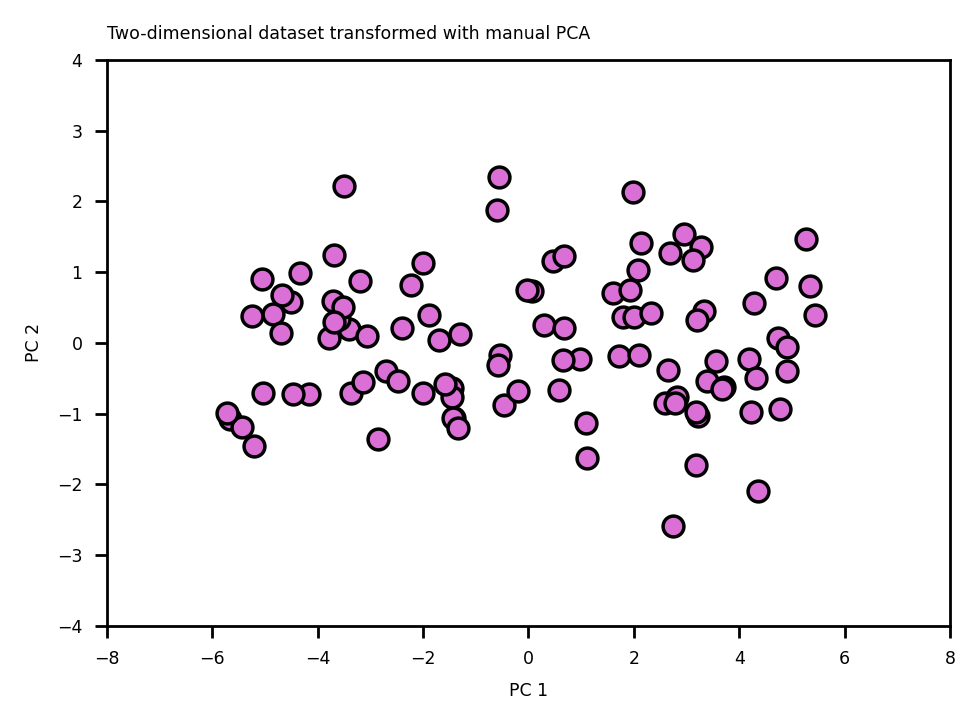

In [16]:
plt.figure(dpi=250, figsize=(4,3))
plt.scatter(X_2d_transformed[:,0], X_2d_transformed[:,1], color='orchid', edgecolor='k', lw=1, label='data points')
plt.title('Two-dimensional dataset transformed with manual PCA', fontsize=5, loc='left')
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.xlabel('PC 1', fontsize=5)
plt.ylabel('PC 2', fontsize=5)
plt.xlim(-8, 8)
plt.ylim(-4, 4)
plt.tight_layout()
plt.show()

Let's compare our naive implementation to the PCA implementation from sklearn

In [17]:
from sklearn.decomposition import PCA 

skl_PCA = PCA(n_components = 2).fit(X_2d) # fit the data to receive eigenvectors of covariance matrix
skl_X_2d_transformed = skl_PCA.transform(X_2d) # apply a transformation

Visualize and compare:

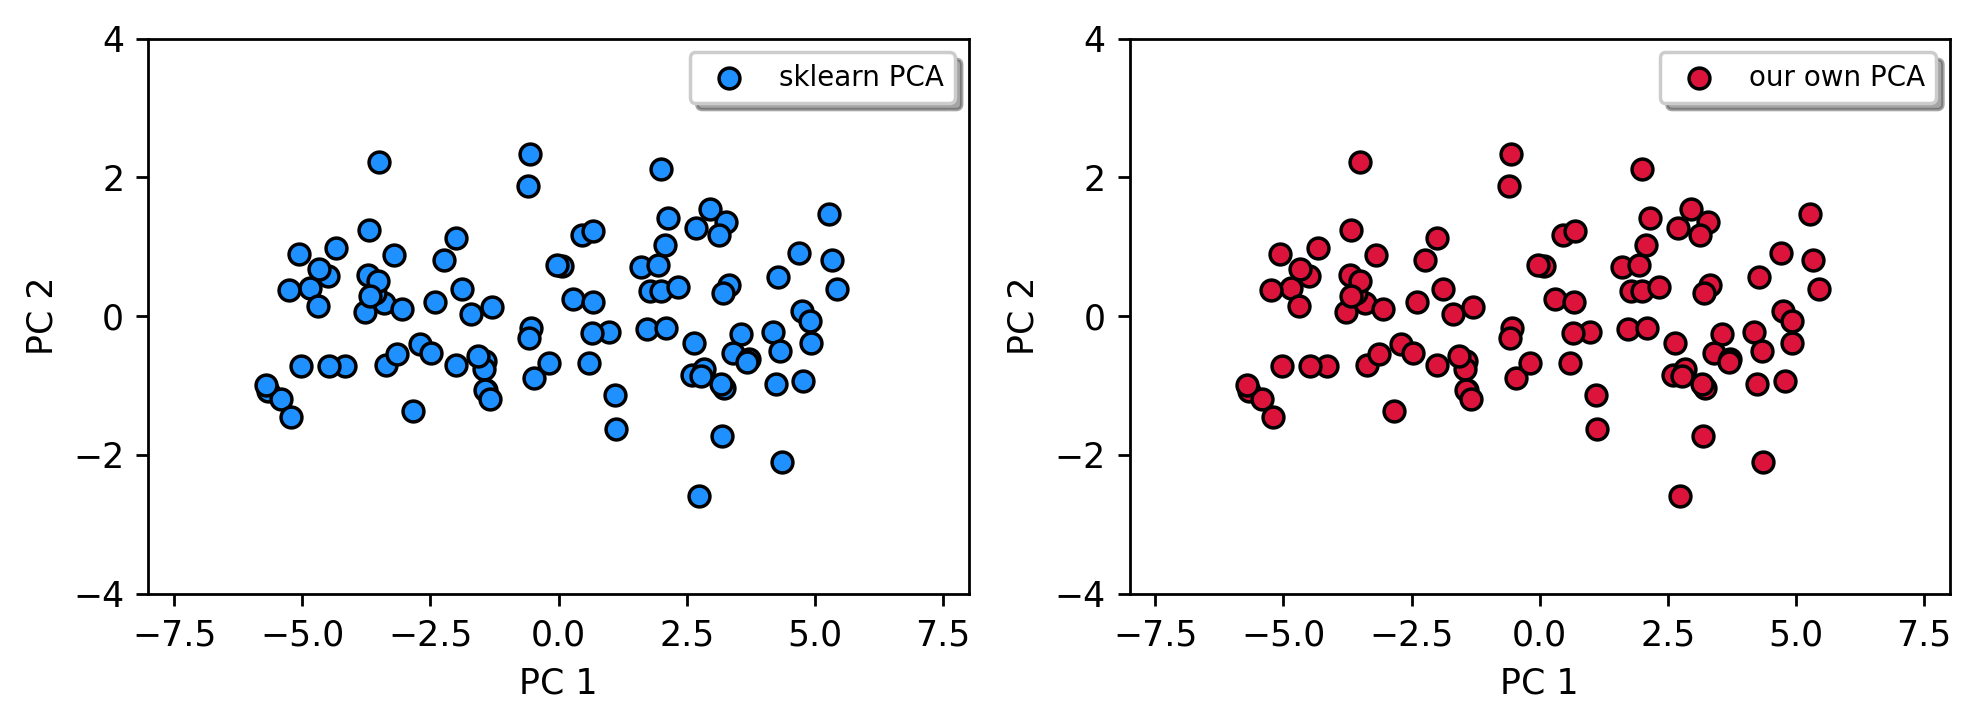

In [18]:
# Visualize
fig, axs = plt.subplots(1, 2, figsize=(8, 3), dpi=250)

axs[0].scatter(skl_X_2d_transformed[:,0], skl_X_2d_transformed[:,1], label='sklearn PCA', color='dodgerblue', edgecolor='k',lw=1)
axs[1].scatter(X_2d_transformed[:,0], X_2d_transformed[:,1], label='our own PCA', color='crimson', edgecolor='k',lw=1)
axs[0].legend(fancybox=True, shadow=True, fontsize=8)
axs[1].legend(fancybox=True, shadow=True, fontsize=8)

for ax in axs:
    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
    ax.set_xlim(-8, 8)
    ax.set_ylim(-4, 4)

plt.tight_layout()
plt.show()

#### Points of interest:
- Looks identical, up to 180 degree rotation (since a rotation oby 180 is the same thing as multiplication by (-1))!
- The 2D data represented by our PCA space looks exactly like the original data, except with some rotation applied to it. Can you explain why this makes sense? (Hint: think about what the rotation achieved with respect to spreading the data along each of the axes.)

____
We will now truncate the data to one dimension and see how it looks. It's called a simple PCA dimensionality reduction.

In [19]:
print(skl_PCA.explained_variance_ratio_)

[0.92180872 0.07819128]


We notice that >90% of variance is described by the first principal component.

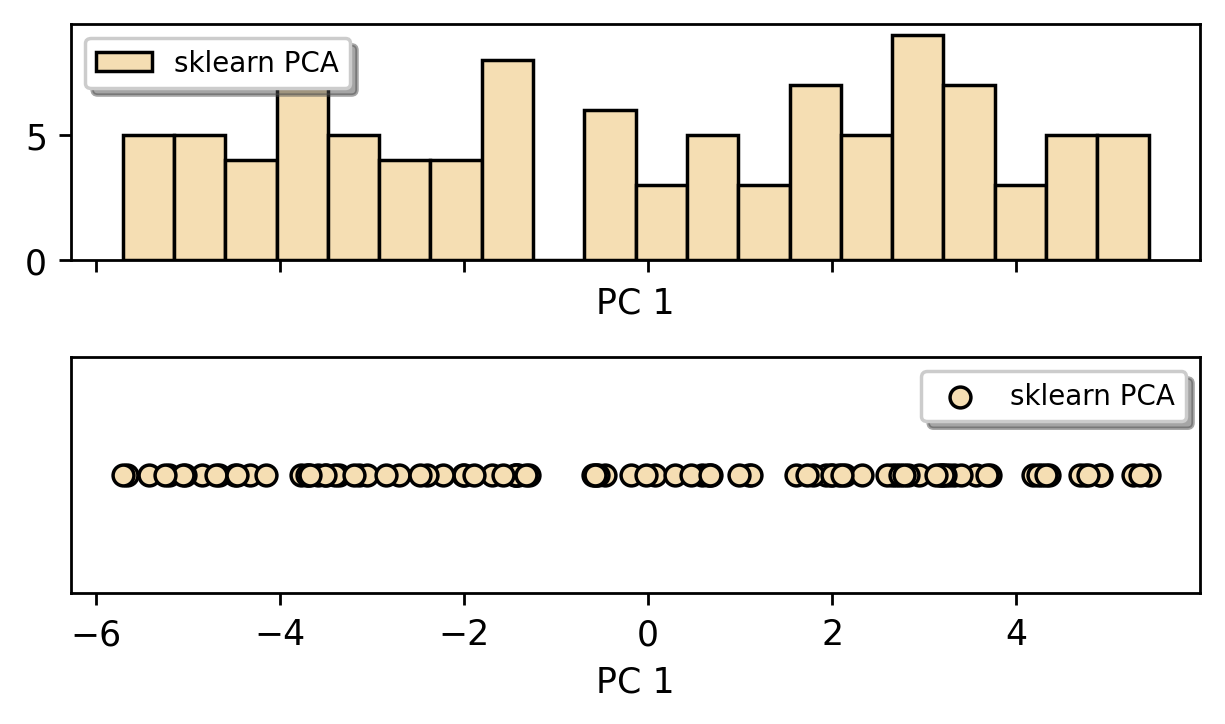

In [24]:
fig, axs = plt.subplots(2, 1, figsize=(5, 3), dpi=250, sharex=True)
axs.flatten()

axs[0].hist(skl_X_2d_transformed[:,0], label='sklearn PCA', color='wheat', edgecolor='k', lw=1, bins=20)
axs[0].legend(fancybox=True, shadow=True, fontsize=8)
plt.yticks([])

axs[1].scatter(skl_X_2d_transformed[:,0] , np.zeros(shape=skl_X_2d_transformed[:,0].shape), label='sklearn PCA', color='wheat', edgecolor='k', lw=1, marker='o')
axs[1].legend(fancybox=True, shadow=True, fontsize=8)

for ax in axs:
    ax.set_xlabel('PC 1')
    
plt.tight_layout()
plt.show()

##### We can see that the data are spread across the first principal components, with no clear clusters.

## Exercise 5.1

Perform principal component analysis on the 1000 points of 784-dimensional MNIST dataset using `sklearn`.
The dataset is already in the memory of the Jupyter Notebook under variable `X`. `Y` contains the label of each handwritten digit, i.e. the number, or the class. [Documentation on sklearn PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) 

784-dimensional dataset has 784 principal components (PC). 

1. Plot the percent variance contained in each PC vs PC number. **Hint**: variable `explained_variance_ratio_` may be useful.
2. Now plot cumulative percent variance vs number of PC components used. Decide how many PC you need to capture 90% of total variance.
2. Use the first two principal components to represent MNIST data set in two dimensions on a scatter plot. Each mnist digit will now be represented as a point. 
3. Show the image of first two principal eigenvectors, rescaled as 28x28. **Hint**: variable `components_` and function `reshape()` might be useful.


In [37]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

# scale the data to have mean = 0 and std = 1
scaler       = preprocessing.StandardScaler()
standardized = scaler.fit_transform(X)

## next we create the PCA object that will perform the transformation of our data

# set number of PCs to keep
nPcs               = 120
PCA                = PCA(n_components=nPcs)
Projections        = PCA.fit_transform(standardized)
explained_per_var  = PCA.explained_variance_ratio_*100 # how much variance is explained by each PC

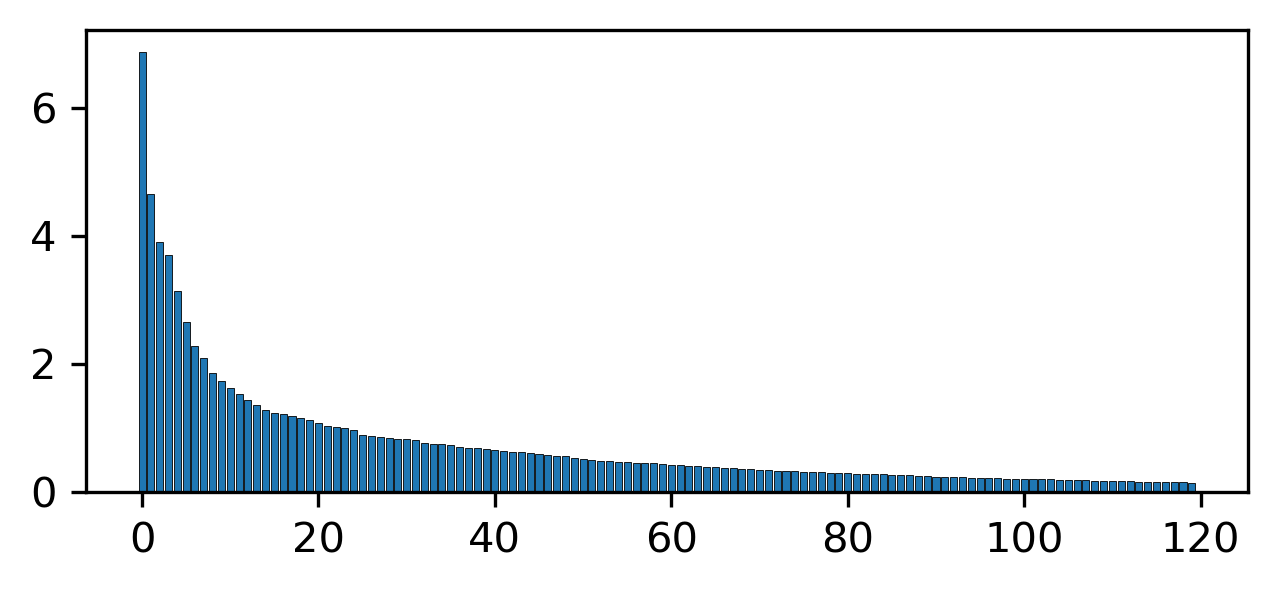

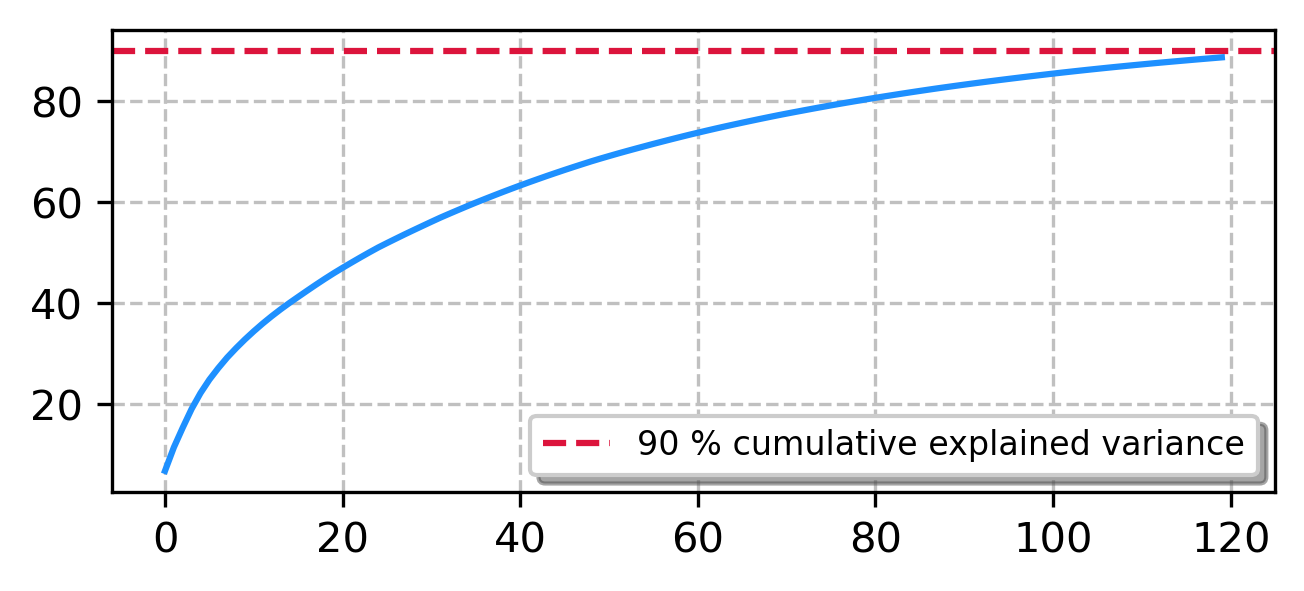

In [38]:
plt.figure(dpi=300, figsize=(5,2))
plt.bar(x = range(len(explained_per_var)), height = PCA.explained_variance_ratio_*100, edgecolor='k', lw=0.2)
plt.show()

plt.figure(dpi=300, figsize=(5,2))
plt.grid(axis='both', ls='--', color='silver', zorder=1)
plt.axhline(90, color='crimson', label='90 % cumulative explained variance', ls = '--')
plt.plot(np.cumsum(PCA.explained_variance_ratio_)*100, color='dodgerblue', zorder=101)
plt.legend(fancybox=True, shadow=True, fontsize=8, loc='lower right')
plt.show()

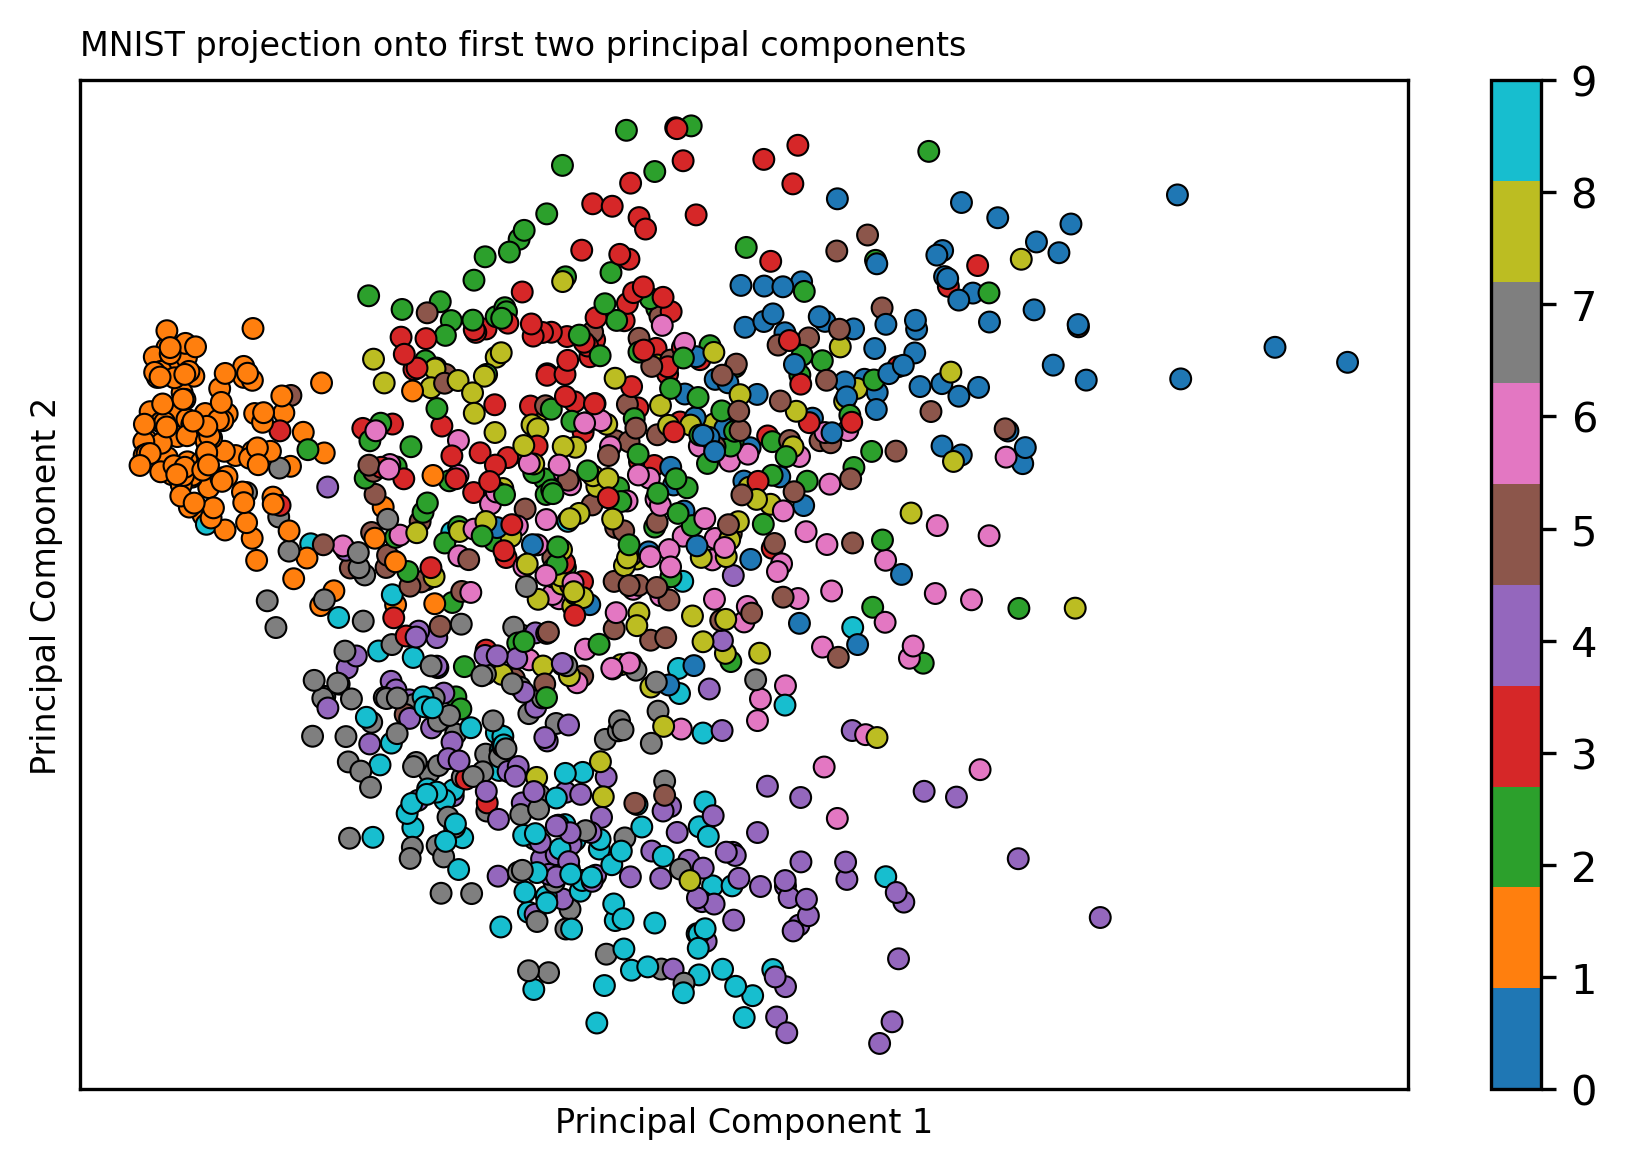

In [35]:
plt.figure(dpi=300, figsize=(6, 4))

plt.title('MNIST projection onto first two principal components', loc='left', fontsize=8)
plt.scatter(Projections[:, 0], Projections[:, 1], edgecolor='k', lw=0.5, s=25, c = Y, cmap = 'tab10')

plt.xlabel('Principal Component 1', fontsize=8)
plt.ylabel('Principal Component 2', fontsize=8)

plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.tight_layout()
plt.show()

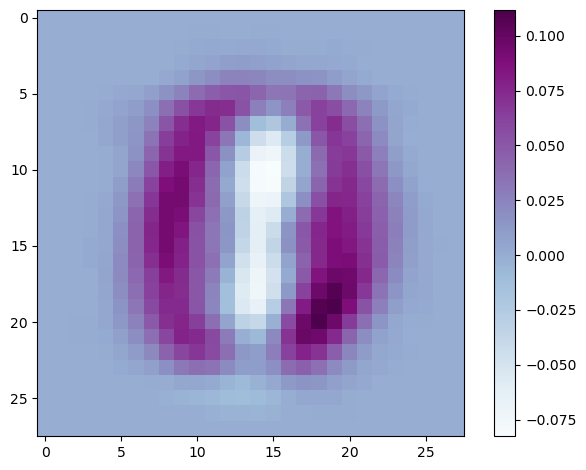

In [32]:
pc_index = 0
pc1_contribution = PCA.components_[pc_index].reshape(28,28)

plt.imshow(pc1_contribution, cmap='BuPu')
plt.colorbar()
plt.tight_layout()
plt.show()

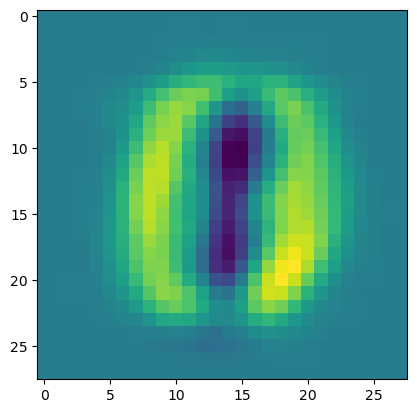

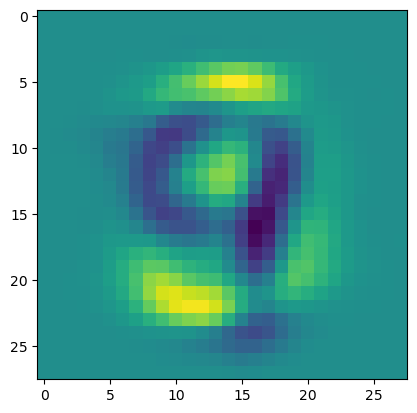

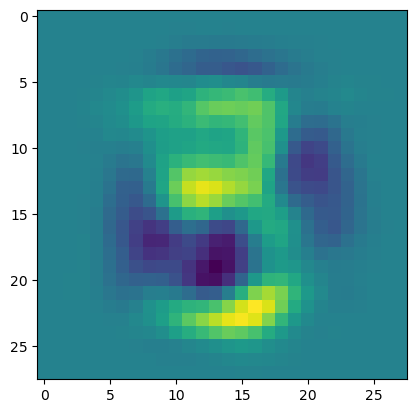

In [13]:
contributions = pd.DataFrame(PCA.components_.T, columns = np.array(list(f'PC {i}' for i in range(1, nPcs+1, 1))))

plt.imshow(contributions.values[:, 0].reshape(28, 28), cmap='viridis')
plt.show()
plt.imshow(contributions.values[:, 1].reshape(28, 28), cmap='viridis')
plt.show()
plt.imshow(contributions.values[:, 2].reshape(28, 28), cmap='viridis')
plt.show()